In [10]:
import pandas as pd
import re
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import correlations

In [8]:
file_dir = os.path.dirname(os.path.realpath('__file__'))
all_data_files = [file for file in os.listdir(Path(os.path.join(file_dir, "../data")))]
all_data_files

['USB30Y_USD_M5.pkl',
 'crypto',
 'XAU_USD_H1.pkl',
 'UK10YB_GBP_H4.pkl',
 'GBP_USD_D.pkl',
 '.DS_Store',
 'GBP_CAD_D.pkl',
 'XAU_USD_D.pkl',
 'XAU_USD_H4.pkl',
 'UK10YB_GBP_H1.pkl',
 'USB10Y_USD_D.pkl',
 'EUR_USD_H1.pkl',
 'GBP_USD_H1.pkl',
 'SPX500_USD_D.pkl',
 'USB10Y_USD_H4.pkl',
 'GBP_CAD_H1.pkl',
 'EUR_USD_H4.pkl',
 'GBP_USD_H4.pkl',
 'USB10Y_USD_H1.pkl',
 'GBP_CAD_H4.pkl',
 'XAU_USD_M5.pkl',
 'WHEAT_USD_H1.pkl',
 'US30_USD_H1.pkl',
 'USB30Y_USD_H1.pkl',
 'USD_CAD_H4.pkl',
 'SPX500_USD_H4.pkl',
 'WHEAT_USD_D.pkl',
 'USB30Y_USD_H4.pkl',
 'SOYBN_USD_D.pkl',
 'USD_CAD_D.pkl',
 'USD_CAD_H1.pkl',
 'US30_USD_D.pkl',
 'SPX500_USD_H1.pkl',
 'WHEAT_USD_H4.pkl',
 'US30_USD_H4.pkl',
 'EUR_GBP_H1.pkl',
 'SOYBN_USD_H1.pkl',
 'EUR_USD_D.pkl',
 'SOYBN_USD_H4.pkl',
 'USB30Y_USD_D.pkl',
 'UK10YB_GBP_D.pkl',
 'EUR_GBP_H4.pkl']

In [9]:
daily_pickle_files = []
for file in all_data_files:
    if len(file) > 6 and file[-6:] == "_D.pkl":
        daily_pickle_files.append(file)
daily_pickle_files

['GBP_USD_D.pkl',
 'GBP_CAD_D.pkl',
 'XAU_USD_D.pkl',
 'USB10Y_USD_D.pkl',
 'SPX500_USD_D.pkl',
 'WHEAT_USD_D.pkl',
 'SOYBN_USD_D.pkl',
 'USD_CAD_D.pkl',
 'US30_USD_D.pkl',
 'EUR_USD_D.pkl',
 'USB30Y_USD_D.pkl',
 'UK10YB_GBP_D.pkl']

In [16]:
dfs = []
for file in daily_pickle_files:
    df = correlations.get_pickle_df_bid_o(f"../data/{file}").rename(correlations.filepath_to_filename(file))
    dfs.append(df)
dfs

[time
 2009-12-31 22:00:00    1.61578
 2010-01-02 22:00:00    1.61542
 2010-01-03 22:00:00    1.61075
 2010-01-04 22:00:00    1.60820
 2010-01-05 22:00:00    1.59902
                         ...   
 2020-12-23 22:00:00    1.34900
 2020-12-27 22:00:00    1.35435
 2020-12-28 22:00:00    1.34475
 2020-12-29 22:00:00    1.34996
 2020-12-30 22:00:00    1.36167
 Name: GBP_USD_D, Length: 3140, dtype: float64,
 time
 2009-12-31 22:00:00    1.70091
 2010-01-02 22:00:00    1.70110
 2010-01-03 22:00:00    1.69358
 2010-01-04 22:00:00    1.67493
 2010-01-05 22:00:00    1.66108
                         ...   
 2020-12-23 22:00:00    1.73314
 2020-12-27 22:00:00    1.74136
 2020-12-28 22:00:00    1.72774
 2020-12-29 22:00:00    1.72976
 2020-12-30 22:00:00    1.73650
 Name: GBP_CAD_D, Length: 3144, dtype: float64,
 time
 2009-12-31 22:00:00    1095.930
 2010-01-03 22:00:00    1096.630
 2010-01-04 22:00:00    1120.960
 2010-01-05 22:00:00    1117.640
 2010-01-06 22:00:00    1137.740
                 

In [17]:
joined = pd.concat(dfs, axis=1).dropna()
joined

,GBP_USD_D,GBP_CAD_D,XAU_USD_D,USB10Y_USD_D,SPX500_USD_D,WHEAT_USD_D,SOYBN_USD_D,USD_CAD_D,US30_USD_D,EUR_USD_D,USB30Y_USD_D,UK10YB_GBP_D
time,,,,,,,,,,,,
2010-01-03 22:00:00,1.61075,1.69358,1096.630,116.056,1117.7,5.307,10.427,1.05078,10476.5,1.43010,115.526,114.636
2010-01-04 22:00:00,1.60820,1.67493,1120.960,116.533,1132.2,5.426,10.493,1.04083,10612.5,1.44114,115.770,115.322
2010-01-05 22:00:00,1.59902,1.66108,1117.640,116.978,1135.4,5.382,10.518,1.03864,10600.1,1.43655,116.391,114.951
2010-01-06 22:00:00,1.60165,1.65329,1137.740,116.699,1136.6,5.525,10.505,1.03197,10600.9,1.44065,115.537,114.692
2010-01-07 22:00:00,1.59306,1.64813,1131.190,116.641,1141.1,5.440,10.196,1.03433,10634.9,1.43079,115.656,114.623
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22 22:00:00,1.33581,1.72301,1860.186,138.303,3686.8,6.075,12.456,1.29066,30022.3,1.21611,172.517,136.537
2020-12-23 22:00:00,1.34900,1.73314,1872.607,138.112,3696.6,6.223,12.546,1.28479,30200.3,1.21823,171.775,135.097
2020-12-28 22:00:00,1.34475,1.72774,1871.546,138.265,3741.7,6.073,12.502,1.28518,30449.3,1.22095,172.364,135.958


In [34]:
correlation_pairs_pearson = joined.corr(method="pearson")
correlation_pairs_pearson

,GBP_USD_D,GBP_CAD_D,XAU_USD_D,USB10Y_USD_D,SPX500_USD_D,WHEAT_USD_D,SOYBN_USD_D,USD_CAD_D,US30_USD_D,EUR_USD_D,USB30Y_USD_D,UK10YB_GBP_D
GBP_USD_D,1.000000,-0.002937,-0.007101,-0.099825,-0.781596,0.652699,0.694606,-0.831150,-0.792361,0.798552,-0.648574,-0.744405
GBP_CAD_D,-0.002937,1.000000,-0.439011,0.019218,0.327968,-0.410674,-0.414478,0.556300,0.273277,-0.442809,0.341719,-0.132303
XAU_USD_D,-0.007101,-0.439011,1.000000,0.697277,0.096496,0.483986,0.367566,-0.223095,0.084955,0.224540,0.322742,0.483035
USB10Y_USD_D,-0.099825,0.019218,0.697277,1.000000,0.179942,0.208618,0.171702,0.101687,0.114209,-0.183822,0.721281,0.465764
SPX500_USD_D,-0.781596,0.327968,0.096496,0.179942,1.000000,-0.537368,-0.600194,0.834587,0.992019,-0.685440,0.686278,0.588020
WHEAT_USD_D,0.652699,-0.410674,0.483986,0.208618,-0.537368,1.000000,0.835489,-0.759712,-0.527136,0.672861,-0.390959,-0.305522
SOYBN_USD_D,0.694606,-0.414478,0.367566,0.171702,-0.600194,0.835489,1.000000,-0.799904,-0.592169,0.716724,-0.416650,-0.490283
USD_CAD_D,-0.831150,0.556300,-0.223095,0.101687,0.834587,-0.759712,-0.799904,1.000000,0.812537,-0.901691,0.731812,0.550270
US30_USD_D,-0.792361,0.273277,0.084955,0.114209,0.992019,-0.527136,-0.592169,0.812537,1.000000,-0.666281,0.634020,0.577607
EUR_USD_D,0.798552,-0.442809,0.224540,-0.183822,-0.685440,0.672861,0.716724,-0.901691,-0.666281,1.000000,-0.732414,-0.522359


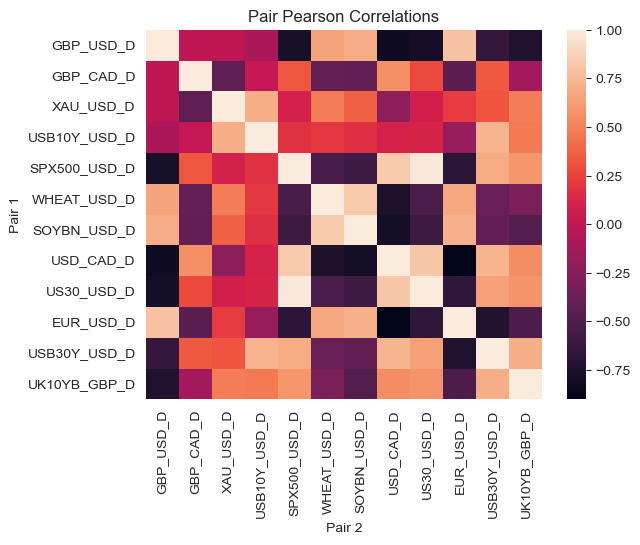

In [35]:
hm = seaborn.heatmap(correlation_pairs_pearson)
# plt.show()
plt.title("Pair Pearson Correlations")
plt.ylabel("Pair 1")
plt.xlabel("Pair 2")
# bottom, top = hm.get_ylim()
# hm.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig(fname="pearson_heatmap.png", format="png", bbox_inches='tight')

In [36]:
correlation_pairs_spearman = joined.corr(method="spearman")
correlation_pairs_spearman

,GBP_USD_D,GBP_CAD_D,XAU_USD_D,USB10Y_USD_D,SPX500_USD_D,WHEAT_USD_D,SOYBN_USD_D,USD_CAD_D,US30_USD_D,EUR_USD_D,USB30Y_USD_D,UK10YB_GBP_D
GBP_USD_D,1.000000,-0.103540,0.063568,-0.064473,-0.749068,0.660111,0.709900,-0.801221,-0.741470,0.803125,-0.674640,-0.737315
GBP_CAD_D,-0.103540,1.000000,-0.439276,-0.015998,0.489515,-0.412395,-0.429698,0.609523,0.485797,-0.443385,0.391569,-0.038483
XAU_USD_D,0.063568,-0.439276,1.000000,0.573031,0.026594,0.503870,0.371361,-0.280033,0.019348,0.289287,0.155394,0.375337
USB10Y_USD_D,-0.064473,-0.015998,0.573031,1.000000,0.087571,0.243485,0.163863,0.045690,0.068447,-0.185925,0.620330,0.319186
SPX500_USD_D,-0.749068,0.489515,0.026594,0.087571,1.000000,-0.523096,-0.622238,0.801696,0.997277,-0.683594,0.699318,0.565480
WHEAT_USD_D,0.660111,-0.412395,0.503870,0.243485,-0.523096,1.000000,0.696187,-0.702669,-0.523654,0.662748,-0.455536,-0.350555
SOYBN_USD_D,0.709900,-0.429698,0.371361,0.163863,-0.622238,0.696187,1.000000,-0.795698,-0.610830,0.693735,-0.475128,-0.485634
USD_CAD_D,-0.801221,0.609523,-0.280033,0.045690,0.801696,-0.702669,-0.795698,1.000000,0.788093,-0.839298,0.704686,0.523534
US30_USD_D,-0.741470,0.485797,0.019348,0.068447,0.997277,-0.523654,-0.610830,0.788093,1.000000,-0.673875,0.680240,0.558246
EUR_USD_D,0.803125,-0.443385,0.289287,-0.185925,-0.683594,0.662748,0.693735,-0.839298,-0.673875,1.000000,-0.779953,-0.506979


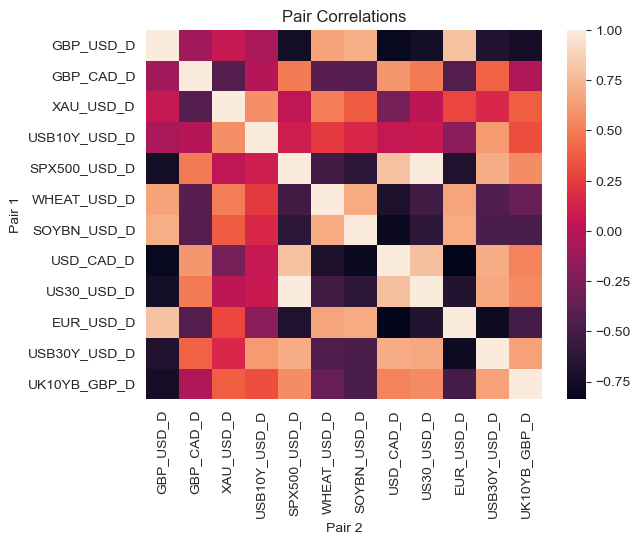

In [37]:
hm2 = seaborn.heatmap(correlation_pairs_spearman)
# plt.show()
plt.title("Pair Spearman Correlations")
plt.ylabel("Pair 1")
plt.xlabel("Pair 2")
# bottom, top = hm.get_ylim()
# hm.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig(fname="spearman_heatmap.png", format="png", bbox_inches='tight')